# Steam Game Recommendation System

# Importing Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sn

In [2]:
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

In [3]:
games = reduce_memory(pd.read_csv("games.csv"))
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500.0,Prince of Persia: Warrior Within™,21-11-2008,True,False,False,Very Positive,84.0,2199.0,9.99,9.99,0.0,True
1,22364.0,BRINK: Agents of Change,03-08-2011,True,False,False,Positive,85.0,21.0,2.99,2.99,0.0,True
2,113020.0,Monaco: What's Yours Is Mine,24-04-2013,True,True,True,Very Positive,92.0,3722.0,14.99,14.99,0.0,True
3,226560.0,Escape Dead Island,18-11-2014,True,False,False,Mixed,61.0,873.0,14.99,14.99,0.0,True
4,249050.0,Dungeon of the ENDLESS™,27-10-2014,True,True,False,Very Positive,88.0,8784.0,11.99,11.99,0.0,True


In [4]:
recommendations = reduce_memory(pd.read_csv('recommendations.csv'))
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370.0,0.0,0.0,12-12-2022,1.0,36.299999,51580.0,0.0
1,304390.0,4.0,0.0,2/17/2017,NaN,11.500000,2586.0,1.0
2,1085660.0,2.0,0.0,11/17/2019,1.0,336.500000,253880.0,2.0
3,703080.0,0.0,0.0,9/23/2022,1.0,27.400000,259432.0,3.0
4,526870.0,0.0,0.0,01-10-2021,1.0,7.900000,23869.0,4.0


In [5]:
users = reduce_memory(pd.read_csv("users.csv"))
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [6]:
games_metadata = pd.read_json('games_metadata.json', lines=True)
games_metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [7]:
games.shape

(50872, 13)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          3000 non-null   float32
 1   title           3000 non-null   object 
 2   date_release    3000 non-null   object 
 3   win             3000 non-null   object 
 4   mac             3000 non-null   object 
 5   linux           3000 non-null   object 
 6   rating          3000 non-null   object 
 7   positive_ratio  3000 non-null   float32
 8   user_reviews    3000 non-null   float32
 9   price_final     3000 non-null   float32
 10  price_original  3000 non-null   float32
 11  discount        3000 non-null   float32
 12  steam_deck      3000 non-null   object 
dtypes: float32(6), object(7)
memory usage: 3.9+ MB


In [9]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58202 entries, 0 to 58201
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          3000 non-null   float32
 1   helpful         3000 non-null   float32
 2   funny           3000 non-null   float32
 3   date            3000 non-null   object 
 4   is_recommended  2565 non-null   float32
 5   hours           3000 non-null   float32
 6   user_id         3000 non-null   float32
 7   review_id       3000 non-null   float32
dtypes: float32(7), object(1)
memory usage: 2.0+ MB


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   5605 non-null   int32
 1   products  5605 non-null   int32
 2   reviews   5605 non-null   int32
dtypes: int32(3)
memory usage: 65.8 KB


In [11]:
games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

### Lets try to drive how many games release on each year

In [12]:
games['date_release'].isnull().sum()

47872

In [13]:
# to_datetime is used to convert into datetime dtype
games['date_release'] = pd.to_datetime(games['date_release'])
games['release_year'] = games['date_release'].dt.year

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_13124\4130818478.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  games['date_release'] = pd.to_datetime(games['date_release'])


In [15]:
# Here User_ID is auto genrated id due to privacy concerns
users['user_id'].unique().shape[0]

5605

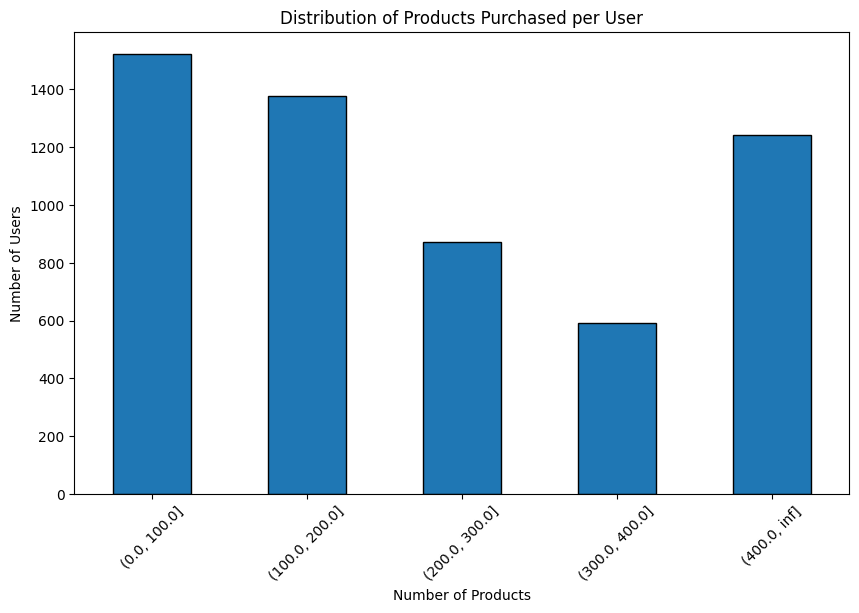

In [16]:
bins = [0 , 100 , 200 , 300 , 400 , float('inf')]

users['product_bin'] = pd.cut(users['products'], bins=bins)

# Count the number of users in each bin
bin_counts = users['product_bin'].value_counts().sort_index()

# Plot a bar plot of the distribution of products per user
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Products Purchased per User')
plt.xlabel('Number of Products')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

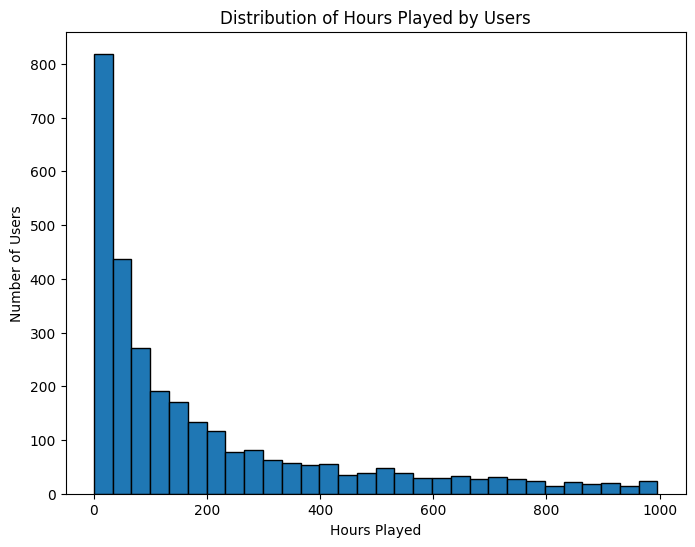

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(recommendations['hours'], bins=30, edgecolor='black')
plt.title('Distribution of Hours Played by Users')
plt.xlabel('Hours Played')
plt.ylabel('Number of Users')
plt.show()

In [19]:
correlation_matrix = recommendations[['helpful', 'funny', 'is_recommended']].corr()

print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                 helpful     funny  is_recommended
helpful         1.000000  0.774017             NaN
funny           0.774017  1.000000             NaN
is_recommended       NaN       NaN             NaN


In [20]:
correlation = recommendations['hours'].corr(recommendations['is_recommended'])
print("Correlation between user activity and recommendation ratings:", correlation)

Correlation between user activity and recommendation ratings: nan


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


is_recommended
1.0    1298
Name: count, dtype: int64


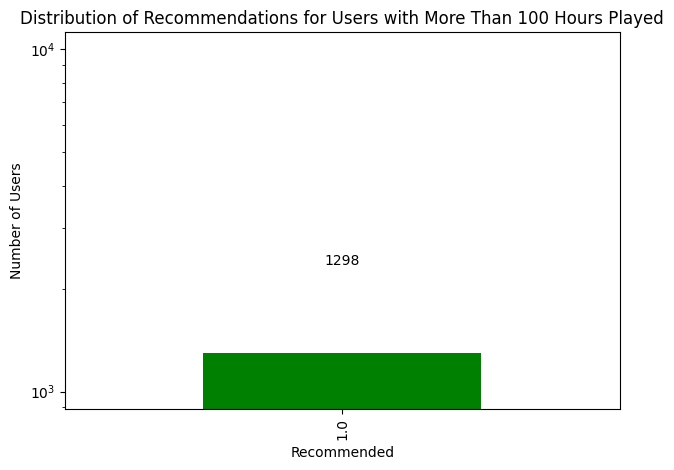

In [21]:
high_activity_users = recommendations[recommendations['hours'] > 100]

recommendation_counts = high_activity_users['is_recommended'].value_counts()
recommendation_counts.plot(kind='bar', color=['green', 'red'])

print(recommendation_counts)

for i, count in enumerate(recommendation_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')
plt.title('Distribution of Recommendations for Users with More Than 100 Hours Played')
plt.xlabel('Recommended')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.tight_layout()

In [22]:
merged_data = pd.merge(games , games_metadata , on = 'app_id' , how = 'inner')

In [23]:
merged_data.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'release_year', 'description', 'tags'],
      dtype='object')

In [24]:
df = merged_data[['app_id', 'title','description', 'tags']]

In [25]:
df.head()

,app_id,title,description,tags
0,13500.0,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364.0,BRINK: Agents of Change,,[Action]
2,113020.0,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560.0,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050.0,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [26]:
df['tags'] = df['tags'].apply(lambda x:' '.join(x))

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_13124\3089831005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x:' '.join(x))


In [27]:
df['overview'] = df['title']+" "+df['description']+" "+df['tags']
df.head()

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_13124\494620436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['title']+" "+df['description']+" "+df['tags']


,app_id,title,description,tags,overview
0,13500.0,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,Action Adventure Parkour Third Person Great So...,Prince of Persia: Warrior Within™ Enter the da...
1,22364.0,BRINK: Agents of Change,,Action,BRINK: Agents of Change Action
2,113020.0,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,Co-op Stealth Indie Heist Local Co-Op Strategy...,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560.0,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,Zombies Adventure Survival Action Third Person...,Escape Dead Island Escape Dead Island is a Sur...
4,249050.0,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,Roguelike Strategy Tower Defense Pixel Graphic...,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [28]:
df.shape

(3000, 5)

In [29]:
final_df = df[['app_id','title','overview']]
final_df.head()

,app_id,title,overview
0,13500.0,Prince of Persia: Warrior Within™,Prince of Persia: Warrior Within™ Enter the da...
1,22364.0,BRINK: Agents of Change,BRINK: Agents of Change Action
2,113020.0,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560.0,Escape Dead Island,Escape Dead Island Escape Dead Island is a Sur...
4,249050.0,Dungeon of the ENDLESS™,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [30]:
import re

def remove_special_characters(s):
  return re.sub(r'[^\w\s]', '', s)

In [31]:
df['overview'] = df['overview'].apply(lambda x : remove_special_characters(x))

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_13124\1345942274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(lambda x : remove_special_characters(x))


In [32]:
df['overview'] = df['overview'].apply(lambda x:x.lower())

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_13124\3439119006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(lambda x:x.lower())


In [33]:
import nltk

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
df['overview'] = df['overview'].apply(stem)

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_13124\432991732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(stem)


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500,stop_words='english')

In [38]:
cv.fit_transform(df['overview']).toarray().shape

(3000, 1500)

In [39]:
vectors = cv.fit_transform(df['overview']).toarray()

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
similarity = cosine_similarity(vectors)

In [42]:
similarity

array([[1.        , 0.05661385, 0.08920516, ..., 0.33506136, 0.15191091,
        0.0855921 ],
       [0.05661385, 1.        , 0.06565322, ..., 0.08219949, 0.        ,
        0.18898224],
       [0.08920516, 0.06565322, 1.        , ..., 0.1942798 , 0.07829603,
        0.34740417],
       ...,
       [0.33506136, 0.08219949, 0.1942798 , ..., 1.        , 0.12253577,
        0.24854791],
       [0.15191091, 0.        , 0.07829603, ..., 0.12253577, 1.        ,
        0.05634362],
       [0.0855921 , 0.18898224, 0.34740417, ..., 0.24854791, 0.05634362,
        1.        ]])

In [43]:
def recommend(game):
    game_index = final_df[final_df['title'] == game].index[0]
    distances = similarity[game_index]
    game_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    for i in game_list:
        print(final_df.iloc[i[0]].title)

In [45]:
final_df.head()

,app_id,title,overview
0,13500.0,Prince of Persia: Warrior Within™,Prince of Persia: Warrior Within™ Enter the da...
1,22364.0,BRINK: Agents of Change,BRINK: Agents of Change Action
2,113020.0,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine Monaco: What's Yo...
3,226560.0,Escape Dead Island,Escape Dead Island Escape Dead Island is a Sur...
4,249050.0,Dungeon of the ENDLESS™,Dungeon of the ENDLESS™ Dungeon of the Endless...


In [47]:
final_df[final_df['title'] == 'BRINK: Agents of Change'].index[0]

1

In [48]:
import pickle

In [49]:
pickle.dump(final_df.to_dict(),open('game_dict.pkl','wb'))

In [50]:
from joblib import dump, load

# Save the large object using joblib
dump(similarity, 'similarity.joblib')

['similarity.joblib']

In [51]:
similarity.shape

(3000, 3000)